In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge, Lasso
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
import warnings
warnings.filterwarnings('ignore')

# Problem 1: Data preparation

In [2]:
wine_white=pd.read_csv('winequality-white.csv',sep=';')
wine_red=pd.read_csv('winequality-red.csv',sep=';')

In [5]:
combined=wine_white.append(wine_red)

In [6]:
X=combined.loc[:,combined.columns!='quality']

In [7]:
y=combined['quality']

In [8]:
X_normalize=normalize(X)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X_normalize,y,test_size=0.20, random_state=42)

# Problem 2: Linear regression

In [10]:
model = LinearRegression().fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10)
print(scores)
print('Average Performance is: %.4f'%np.mean(scores))
#r_sq = model.score(x, y)
#print('coefficient of determination:', r_sq)

[0.19664201 0.20913544 0.14349591 0.22385844 0.20474605 0.1526096
 0.13917479 0.16686326 0.18906068 0.20693535]
Average Performance is: 0.1833


Average performance on train set is 18% and there is no wild oscillation in performance measure.

In [11]:
model = LinearRegression().fit(X_train, y_train)
r_sq = model.score(X_train, y_train)
print(r_sq)

0.18883839904096955


In [12]:
y_pred=model.predict(X_test)
r2_test=r2_score(y_test, y_pred)
print(r2_test)

0.17157030719137134


There is no big difference between the average performance of train and test set. However, R2 of both sets are low in that it only accounts for 18% (17%) of variance in dependent variable for training set (test set).

# Problem 3. Ridge and Lasso Regression

In [13]:
parameters = [{'alpha': np.logspace(-6,3,num=10) }]

In [32]:
ridge=Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid = parameters,
                                 n_jobs = -1)

In [33]:
grid_search_ridge.fit(X_train,y_train)
print(grid_search_ridge.best_params_)
print(grid_search_ridge.best_score_)

{'alpha': 0.0001}
0.18292671374284009


In [34]:
Ridgeregression = Ridge(random_state=3, **grid_search_ridge.best_params_)
all_accuracies_ridge = cross_val_score(estimator=Ridgeregression, X=X_train, y=y_train, cv=10)
print(all_accuracies_ridge)
print(all_accuracies_ridge.mean())

[0.19603903 0.20945137 0.14447657 0.22385922 0.20414596 0.15301188
 0.13980168 0.16654562 0.18873667 0.20686846]
0.18329364610726015


In [35]:
Ridgeregression = Ridge(random_state=3, **grid_search_ridge.best_params_)
all_accuracies_ridge_test = cross_val_score(estimator=Ridgeregression, X=X_test, y=y_test, cv=10)
print(all_accuracies_ridge_test)
print(all_accuracies_ridge_test.mean())

[ 0.06603132  0.22863024  0.20608591  0.24777701  0.14583935 -0.04099951
  0.18460784  0.08808578  0.20094038  0.1916175 ]
0.15186158173891762


In [36]:
model_ridge = RidgeCV(alphas = np.logspace(-6,3,num=10)).fit(X_train, y_train)
coef_ridge = pd.Series(model_ridge.coef_, index = pd.DataFrame(X_train).columns)
coef_ridge

0       1.611222
1     -48.395134
2     -17.738072
3       0.932336
4     -52.185748
5       1.987493
6       2.605123
7    -121.300147
8     -13.142505
9      33.233384
10     16.463031
dtype: float64

In [37]:
lasso=Lasso(max_iter = 100000)
grid_search_lasso = GridSearchCV(lasso, param_grid = parameters,
                           n_jobs = -1)

In [38]:
grid_search_lasso.fit(X_train,y_train)
print(grid_search_lasso.best_params_)
print(grid_search_lasso.best_score_)

{'alpha': 1e-06}
0.18292294734456932


In [25]:
lassoregression = Lasso(random_state=3, **grid_search_lasso.best_params_)
all_accuracies_lasso = cross_val_score(estimator=lassoregression, X=X_train, y=y_train, cv=10)
print(all_accuracies_lasso)
print(all_accuracies_lasso.mean())

[0.19645777 0.20913805 0.14395963 0.22393456 0.20449764 0.15262021
 0.13949097 0.16663188 0.18903069 0.206887  ]
0.18326484124250014


In [27]:
lassoregression = Lasso(random_state=3, **grid_search_lasso.best_params_)
all_accuracies_lasso_test = cross_val_score(estimator=lassoregression, X=X_test, y=y_test, cv=10)
print(all_accuracies_lasso_test)
print(all_accuracies_lasso_test.mean())

[ 0.0689566   0.22994101  0.20055618  0.24788141  0.14972482 -0.06289103
  0.18817177  0.08733033  0.20276292  0.19469606]
0.15071300862103892


In [28]:
model_lasso = LassoCV(alphas = np.logspace(-6,3,num=10)).fit(X_train, y_train)
coef_lasso = pd.Series(model_lasso.coef_, index = pd.DataFrame(X_train).columns)
coef_lasso

0       1.771755
1     -48.559211
2     -17.585083
3       0.946560
4     -51.194427
5       1.987816
6       2.622584
7    -130.863955
8     -10.794361
9      32.898552
10     16.518150
dtype: float64

After applying grid search on training in Ridge and Lasso regression, the mean accuracy is 0.18 for Ridge and 0.15 for Lasso. What is striking is the fluctuation of the performance in test set for both models. However, the mean of accuracy on test set for both models is close to what we found on train set.

# Problem 4. Visualization Performance

Text(0, 0.5, 'Scores')

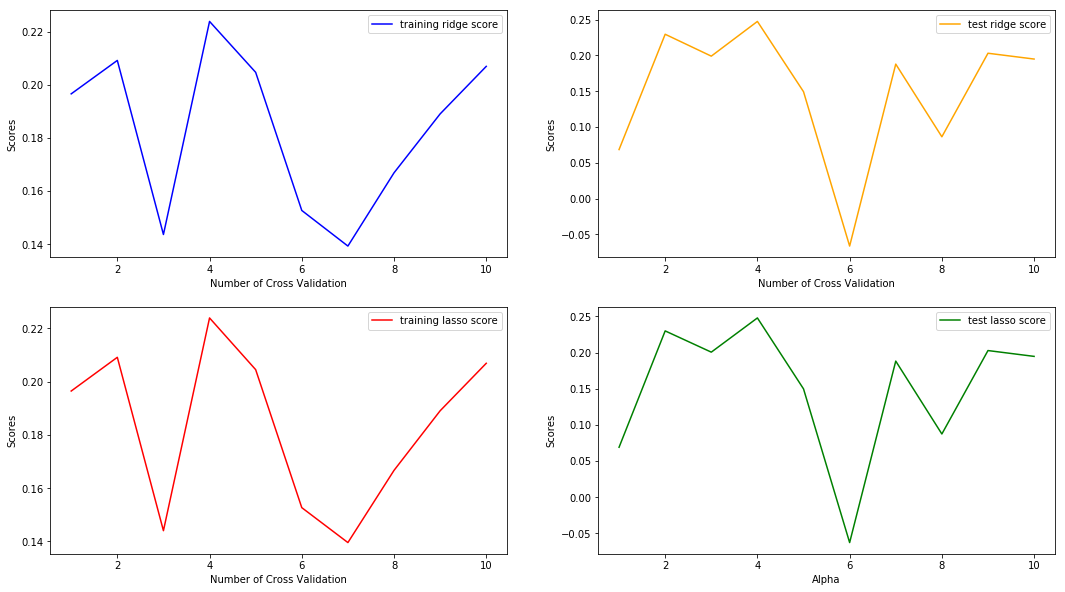

In [31]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.plot(np.arange(1,11,1), all_accuracies_ridge, color='blue', label='training ridge score')
plt.legend(loc='best')
plt.xlabel('Number of Cross Validation')
plt.ylabel('Scores')
plt.subplot(2,2,2)
plt.plot(np.arange(1,11,1), all_accuracies_ridge_test, color='orange', label='test ridge score')
plt.legend(loc='best')
plt.xlabel('Number of Cross Validation')
plt.ylabel('Scores')
plt.subplot(2,2,3)
plt.plot(np.arange(1,11,1), all_accuracies_lasso, color='red', label='training lasso score')
plt.legend(loc='best')
plt.xlabel('Number of Cross Validation')
plt.ylabel('Scores')
plt.subplot(2,2,4)
plt.plot(np.arange(1,11,1), all_accuracies_lasso_test, color='green', label='test lasso score')
plt.legend(loc='best')
plt.xlabel('Alpha')
plt.ylabel('Scores')

This graph tells us that the performance of the models vary based on cross validation. For instance, Ridge regression on train set has lowest performance in 7th chunk and best performance in 4th chunk. Performance on test set is different from train set but the performance of both models are same on train and test set.

Optimum alpha values are 0.0001 and  1e-06 for Ridge and Lasso, respectively and the corresponding coefficients of determination are 0.18292294734456932 and 0.18292671374284009  for Ridge and Lasso, respectively. The bottomline is Ridge outperforms Lasso by margin.

# Problem 5. Visualize the coefficients

In [285]:
import matplotlib

Text(0.5, 1.0, 'Coefficients in the Ridge Model')

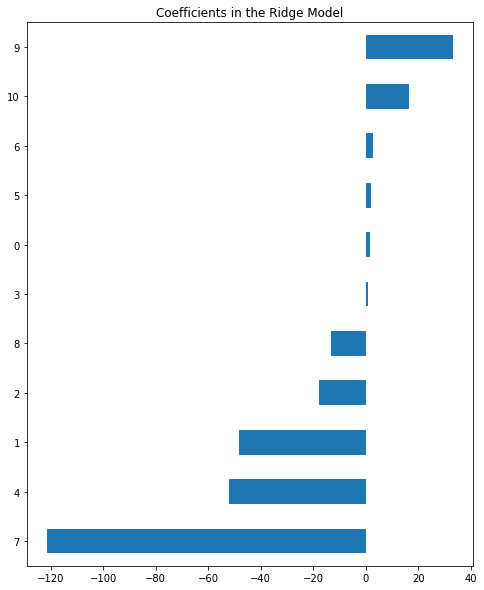

In [286]:
imp_coef = pd.concat([coef_ridge.sort_values()])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

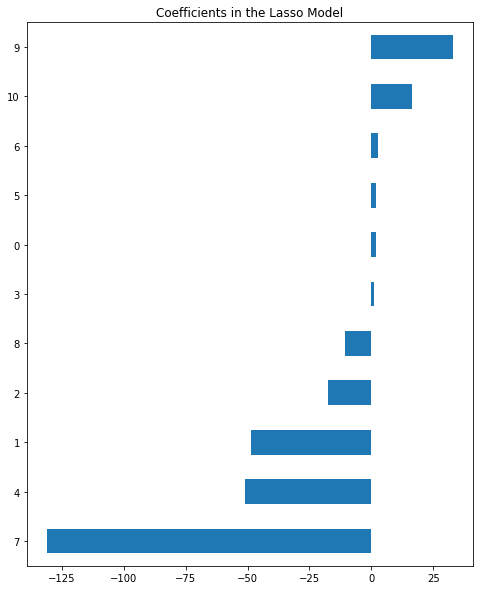

In [287]:
imp_coef = pd.concat([coef_lasso.sort_values()])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

These plots indicate that the importance of the estimated coefficients vary and some coefficients are very close to 0 implying very low impact on the wine quality.  As it is L1, Lasso has the property of feature selection but as we do not have a coefficient with 0 value, none of the coefficient can be dropped.

# 6. Classification Problem

In [271]:
def categorize(data):
    if data<=5:
        return 'BAD'
    elif data>5 & data<=7:
        return 'AVERAGE'
    else:  
        return 'GOOD'

In [272]:
combined['quality_bin'] = combined['quality'].apply(categorize)

In [273]:
combined[combined['quality_bin']=='GOOD']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bin


In [274]:
del combined['quality']

In [276]:
combined.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bin
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,AVERAGE
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,AVERAGE
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,AVERAGE
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,AVERAGE
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,AVERAGE


In [277]:
X=combined.loc[:,combined.columns!='quality_bin']

In [279]:
y=combined['quality_bin']

In [280]:
X_normalize=normalize(X)

In [281]:
X_train,X_test,y_train,y_test=train_test_split(X_normalize,y,test_size=0.20, random_state=42)

In [278]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [283]:
seed = 7
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.688278 (0.016021)
CART: 0.752159 (0.022942)
NB: 0.633062 (0.027803)
SVM: 0.631334 (0.015495)


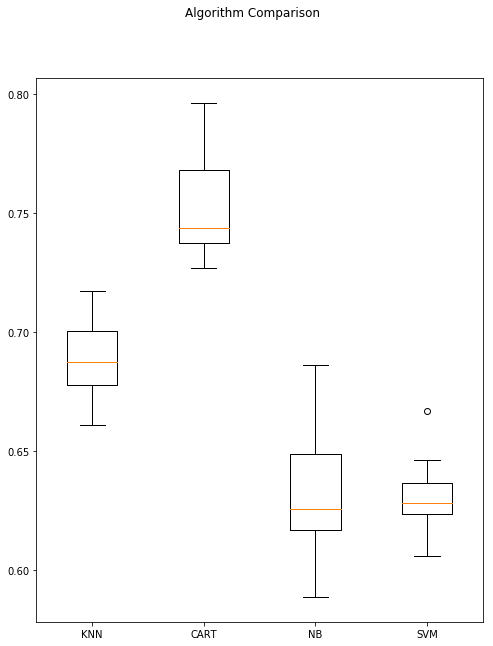

In [284]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Of models, `Decision tree` (accuracy of 0.75) has the best performance and the `Naive Bayes` (accuracy of 0.63) has the lowest performance. In my opinion, DF performs better since
* We have important features
* Entire dataset and features are used